In [1]:
import csv
!pip install scikit-learn
!pip install pandas
!pip install seaborn
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 5.7 MB/s eta 0:00:00 MB/s eta 0:00:01


# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 5

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
Total params: 1125 (4.39 KB)
Trainable params: 1125 (4.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/32 [..............................] - ETA: 7s - loss: 1.6747 - accuracy: 0.1719
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 5ms/step - loss: 1.5727 - accuracy: 0.2515 - val_loss: 1.4827 - val_accuracy: 0.3141
Epoch 2/1000
 1/32 [..............................] - ETA: 0s - loss: 1.4937 - accuracy: 0.3438
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 1.4711 - accuracy: 0.3299 - val_loss: 1.3981 - val_accuracy: 0.3525
Epoch 3/1000
 1/32 [..............................] - ETA: 0s - loss: 1.4157 - accuracy: 0.3516
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 1.4192 - accuracy: 0.3572 - val_loss: 1.3298 - val_accuracy: 0.4316
Epoch 4/1000
 1/32 [..............................] - ETA: 0s - loss: 1.3344 - accuracy: 0.3750
E

/Users/tyler/Desktop/SCHOOL/CAPSTONE/OpenCV/open_cv_env/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 6: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 1.2632 - accuracy: 0.4506 - val_loss: 1.1127 - val_accuracy: 0.6038
Epoch 7/1000
 1/32 [..............................] - ETA: 0s - loss: 1.2515 - accuracy: 0.4375
Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 1.2185 - accuracy: 0.4691 - val_loss: 1.0513 - val_accuracy: 0.6312
Epoch 8/1000
 1/32 [..............................] - ETA: 0s - loss: 1.2320 - accuracy: 0.4453
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 1.1805 - accuracy: 0.4812 - val_loss: 0.9910 - val_accuracy: 0.6475
Epoch 9/1000
 1/32 [..............................] - ETA: 0s - loss: 1.1778 - accuracy: 0.4531
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [=============

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 [==============================] - 0s 1ms/step - loss: 0.2620 - accuracy: 0.9453


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 40ms/step
[8.9295179e-01 1.0701420e-01 1.9209894e-05 1.9304796e-06 1.2789557e-05]
0


# 混同行列

43/43 [==============================] - 0s 401us/step


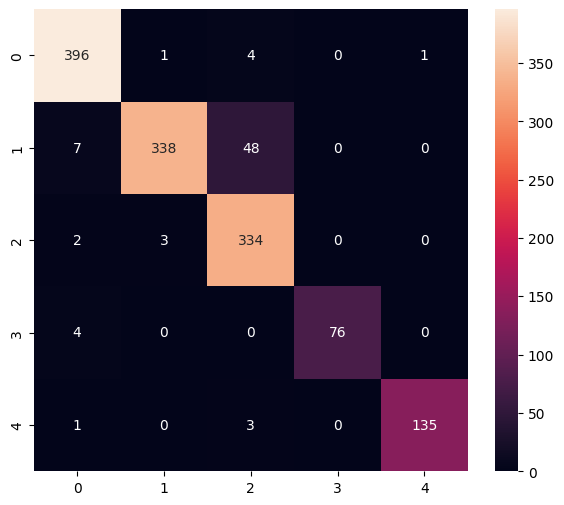

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       402
           1       0.99      0.86      0.92       393
           2       0.86      0.99      0.92       339
           3       1.00      0.95      0.97        80
           4       0.99      0.97      0.98       139

    accuracy                           0.95      1353
   macro avg       0.96      0.95      0.95      1353
weighted avg       0.95      0.95      0.95      1353



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

/Users/tyler/Desktop/SCHOOL/CAPSTONE/OpenCV/open_cv_env/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/4l/qwn4ljgj73j80nqb2176qccr0000gn/T/tmpmfi2pax6/assets


INFO:tensorflow:Assets written to: /var/folders/4l/qwn4ljgj73j80nqb2176qccr0000gn/T/tmpmfi2pax6/assets
2024-01-03 16:47:17.309545: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-01-03 16:47:17.309558: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-01-03 16:47:17.309810: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/4l/qwn4ljgj73j80nqb2176qccr0000gn/T/tmpmfi2pax6
2024-01-03 16:47:17.310441: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-01-03 16:47:17.310446: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /var/folders/4l/qwn4ljgj73j80nqb2176qccr0000gn/T/tmpmfi2pax6
2024-01-03 16:47:17.311812: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-01-03 16:47:17.312508: I tensorflow/cc/saved_model/load

6588

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 46 µs, sys: 39 µs, total: 85 µs
Wall time: 63.2 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[8.9295161e-01 1.0701443e-01 1.9209891e-05 1.9304866e-06 1.2789580e-05]
0
